In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

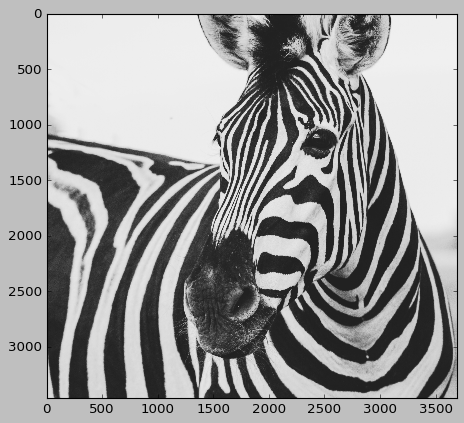

In [2]:
plt.style.use('classic')
imagen = Image.open("./Img/imagen_ejemplo_frida_bredesen.jpg")
plt.imshow(imagen)

In [3]:
imagen_gr = imagen.convert("LA")

imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)

imagen_mat = imagen_mat.reshape(imagen_gr.size[1], imagen_gr.size[0])

In [5]:
U, D, V = np.linalg.svd(imagen_mat)

In [6]:
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(3456, 3693)
(3456, 3456)
(3456,)
(3693, 3693)


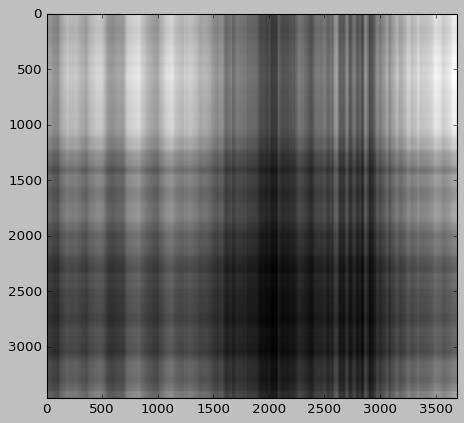

In [8]:
imagen_recons = np.matrix(U[:,:1]) * np.diag(D[:1]) * np.matrix(V[:1,:])
plt.imshow(imagen_recons, cmap='gray')

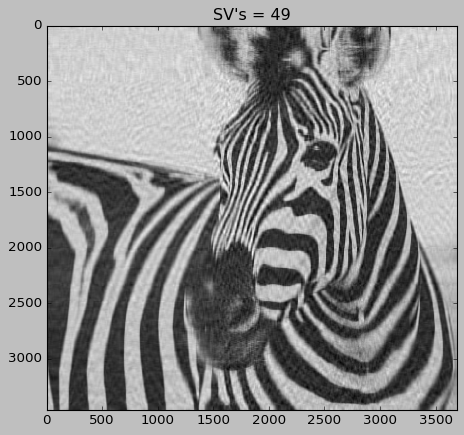

In [10]:
from IPython.display import clear_output

plt.figure()
for n in range(50):
    plt.imshow(U[:,:n]@np.diag(D[:n])@V[:n,:], cmap='gray')
    plt.title(f"SV's = {n}")
    plt.show()
    clear_output(wait=True)